In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
start=pd.read_csv("50_Startups.csv")

In [3]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
start1=start.rename({'R&D Spend':'Research','Administration':'Admin','Marketing Spend':'MS'},axis=1)

In [6]:
start.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


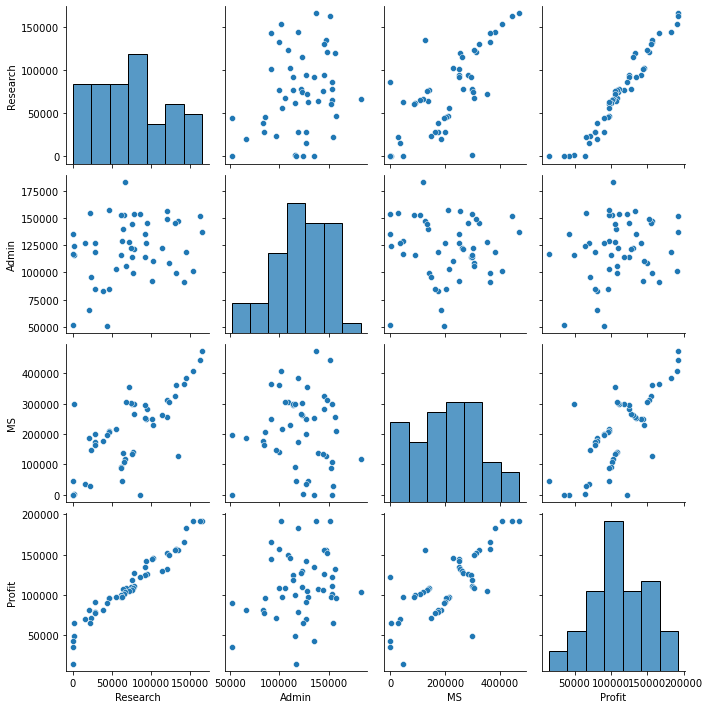

In [7]:
sns.pairplot(start1)

In [8]:
model=smf.ols("Profit~Research+Admin+MS",data=start1).fit()

In [9]:
model.params

Intercept    50122.192990
Research         0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [10]:
model.tvalues

Intercept     7.626218
Research     17.846374
Admin        -0.525507
MS            1.655077
dtype: float64

In [11]:
model.pvalues

Intercept    1.057379e-09
Research     2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64

In [12]:
SLR=smf.ols("Profit~Admin",data=start1).fit()

In [13]:
SLR.tvalues

Intercept    3.040044
Admin        1.419493
dtype: float64

In [14]:
SLR.pvalues

Intercept    0.003824
Admin        0.162217
dtype: float64

In [15]:
SLR_1=smf.ols("Profit~MS",data=start1).fit()

In [16]:
SLR_1.tvalues

Intercept    7.808356
MS           7.802657
dtype: float64

In [17]:
SLR_1.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [18]:
MLR=smf.ols("Profit~Admin+MS",data=start1).fit()

In [19]:
MLR.pvalues

Intercept    2.589341e-01
Admin        1.729198e-02
MS           9.727245e-11
dtype: float64

In [20]:
MLR.tvalues

Intercept    1.142741
Admin        2.467779
MS           8.281039
dtype: float64

In [21]:
rsq_r=smf.ols("Research~Admin+MS",data=start1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~Research+MS",data=start1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~Research+Admin",data=start1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['Research','Admin','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Research,2.468903
1,Admin,1.175091
2,MS,2.326773


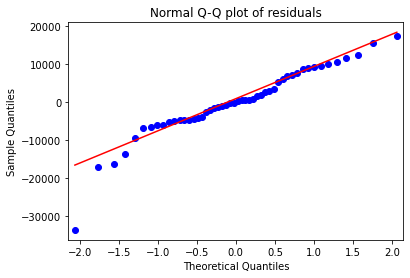

In [22]:
#2) Residual Analysis
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid>5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

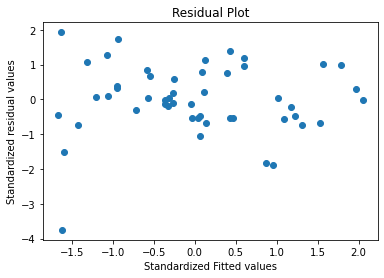

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

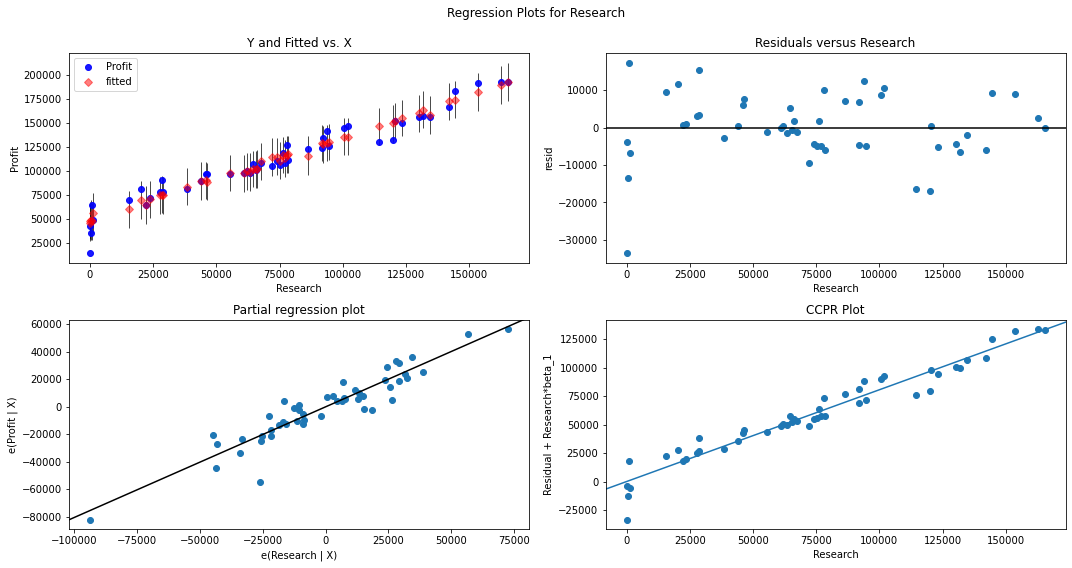

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Research", fig=fig)
plt.show()

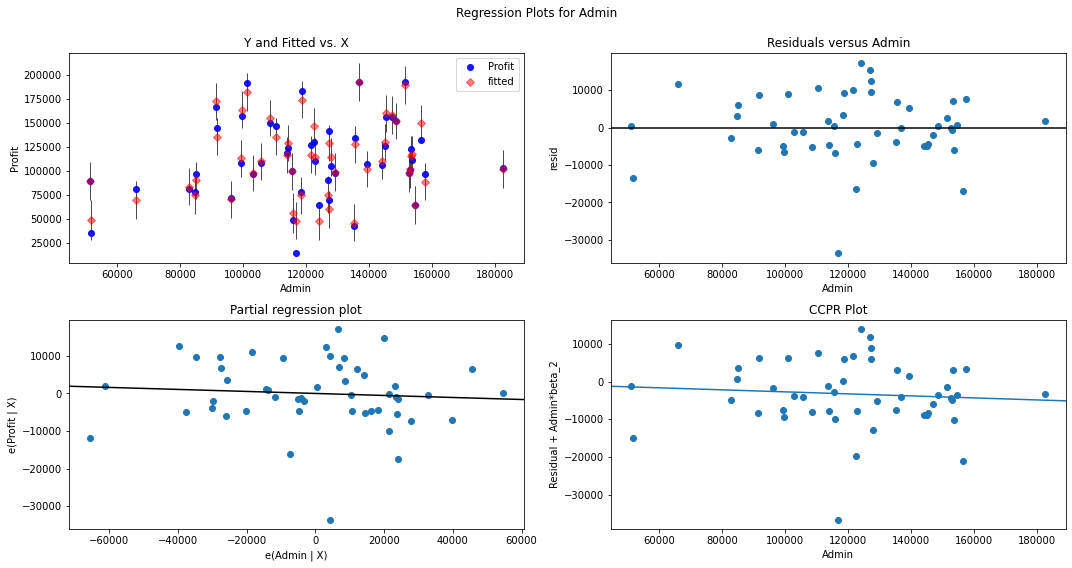

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

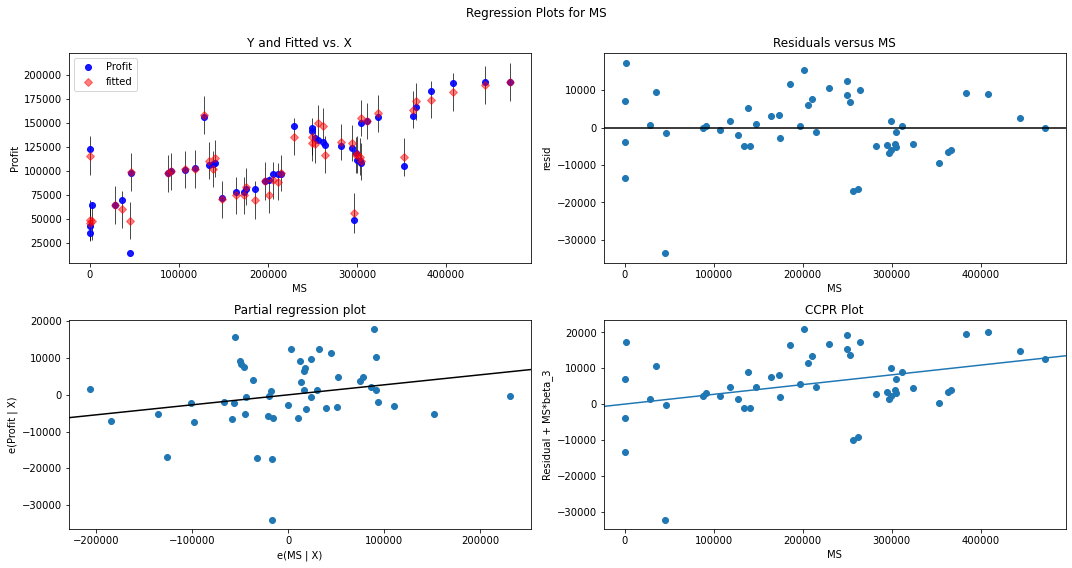

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [29]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance¶
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

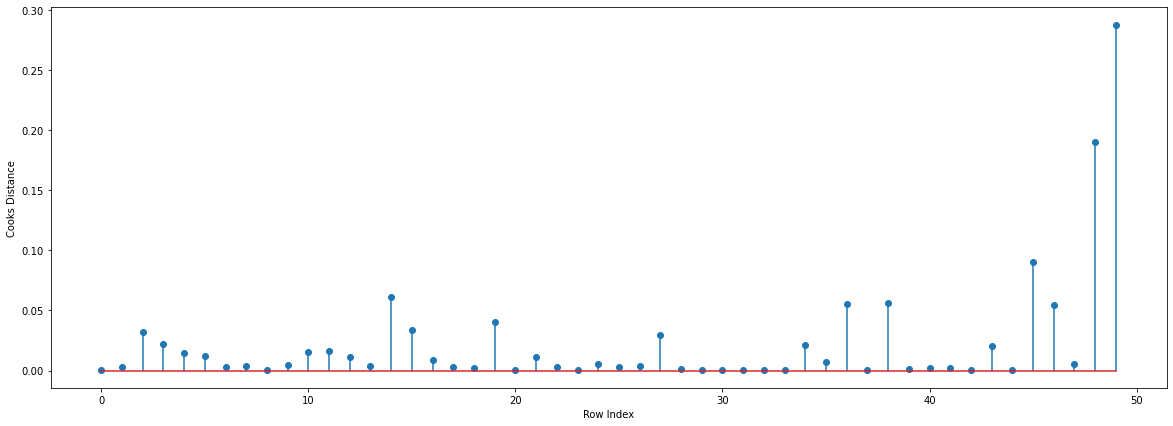

In [30]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(start1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

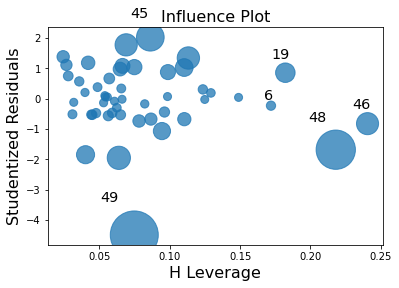

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=start1.shape[1]
n=start1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [34]:
start1[start1.index.isin([49])]

,Research,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [35]:
Start2=start1.drop(start1.index[[49]],axis=0).reset_index(drop=True)
Start2.head()

,Research,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
model2=smf.ols("Profit~Research+Admin+MS",data=Start2).fit()

In [37]:
model2.params

Intercept    52382.439251
Research         0.783002
Admin           -0.022201
MS               0.025234
dtype: float64

In [38]:
model2.tvalues

Intercept     9.450782
Research     20.469501
Admin        -0.517889
MS            1.825383
dtype: float64

In [39]:
model2.pvalues

Intercept    2.960000e-12
Research     1.971077e-24
Admin        6.070728e-01
MS           7.458443e-02
dtype: float64

In [40]:
model2.rsquared

0.9613162435129847

In [41]:
model2.rsquared_adj

0.9587373264138503

In [42]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

In [43]:
np.argmax(c) , np.max(c)

(48, 0.39274420556321554)

In [44]:
new_data=pd.DataFrame({'Research':70000,"Admin":90000,"MS":140000},index=[0])
new_data

,Research,Admin,MS
0,70000,90000,140000


In [45]:
model2.predict(new_data)

0    108727.154753
dtype: float64

In [46]:
Predict=model2.predict(Start2)

In [47]:
Predict

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [48]:
S1={'Prep_Models':['Model','Model2'],'Rsquared':[model.rsquared,model2.rsquared]}
table=pd.DataFrame(S1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model2,0.961316
